### Imported the required libraries

In [533]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import hvplot.pandas
import panel as pn
import holoviews as hv
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import math

### Here i have made dataframe ( DailyVisitor) for Time Series data.


In [534]:
# Time Series Dataframe

DailyVisitor = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueDailyVisitors.csv', index_col=0)
DailyVisitor.index = pd.to_datetime(DailyVisitor.index)
#pd.plotting.register_matplotlib_converters()
DailyVisitor_sort = DailyVisitor.reindex(DailyVisitor.max(axis=1).sort_values().index)

#print(data.head())
averageage = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueAge.csv', index_col=0)
max_travel = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueDistance.csv', index_col=0)
visit_duration = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueDuration.csv', index_col=0)
propotion_female = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueGender.csv', index_col=0)
avg_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001188147/VenueSpend.csv', index_col=0)

### Additionally, i have made other dataframe (combined_data), which include the time series data ( Daily Visitors) and summary data of Venues. 

In [535]:
# Summary Dataframe

combined_data = pd.DataFrame(index = DailyVisitor.columns)

#merge column according thier name
combined_data['VenueAge'] = averageage.values
combined_data['VenueDisatnce'] = max_travel.values
combined_data['VenueDuration'] = visit_duration.values
combined_data['VenueGender'] = propotion_female.values
combined_data['VenueSpend'] = avg_spend.values
combined_data['VenueDailyVisitor'] = DailyVisitor.mean()

### Printed the first 5 rows of both the dataframes(DailyVisitor and combined_data)

In [536]:
print(DailyVisitor.head())
print(combined_data.head())

            CWN  YVW  UFY  YXF  XPE  AWF  XFP  ZFX  ZPL  RDA  ...  WRL  VLS  \
Date                                                          ...             
2019-01-01  267    0   59   72   69  221   66   85   61  492  ...   80   71   
2019-01-02  198    0   71   80   82  135   77   94   57  605  ...   73   76   
2019-01-03  206    0   65   73   66  106   71   93   65  514  ...   80   68   
2019-01-04  153    0   59   77   63   99   66   93   50  254  ...   78   79   
2019-01-05  178    0   67   78   87   51   87   97   63  512  ...   87   47   

            SPF  ZJB  AXM  DKS  XLA  XJT  VRD  YDI  
Date                                                
2019-01-01  746    0   68  213   86   74   64    0  
2019-01-02  414    0   23  188   87   65   52    0  
2019-01-03  507    0   68  149   72   91   63    0  
2019-01-04  276    0   71  114   66   82   58    0  
2019-01-05  261    0   48  109  104   77   56    0  

[5 rows x 40 columns]
     VenueAge  VenueDisatnce  VenueDuration  VenueGe

### Used describe function to know the data distribution the the time series dataframe.

In [537]:
DailyVisitor.describe()

CWN         YVW         UFY         YXF         XPE         AWF  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean   206.909589   14.964384   65.013699   78.539726   75.095890  136.868493   
std     48.238476   37.032379    9.232190    4.423549   14.051871   46.196477   
min     81.000000    0.000000   38.000000   66.000000   32.000000   21.000000   
25%    171.000000    0.000000   59.000000   75.000000   66.000000  100.000000   
50%    209.000000    0.000000   64.000000   79.000000   75.000000  137.000000   
75%    244.000000    0.000000   71.000000   82.000000   84.000000  172.000000   
max    332.000000  242.000000   92.000000   94.000000  124.000000  244.000000   

              XFP         ZFX         ZPL         RDA  ...         WRL  \
count  365.000000  365.000000  365.000000  365.000000  ...  365.000000   
mean    69.632877   93.520548   30.547945  488.378082  ...   81.147945   
std      8.769767    4.348517   31.169001  118.576606  ...    8.634840   
min     38.000000   80.000000    0.000000  125.000000  ...   59.000000   
25%     64.000000   91.000000    0.000000  405.000000  ...   76.000000   
50%     70.000000   93.000000    0.000000  493.000000  ...   81.000000   
75%     76.000000   96.000000   61.000000  570.000000  ...   87.000000   
max     93.000000  106.000000   80.000000  800.000000  ...  111.000000   

              VLS         SPF         ZJB         AXM         DKS         XLA  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    67.504110  451.616438   37.594521   59.038356  153.641096   88.356164   
std      7.003775   97.238693   50.847974   12.028065   35.755273   12.790546   
min     47.000000  230.000000    0.000000   23.000000   90.000000   50.000000   
25%     63.000000  379.000000    0.000000   51.000000  115.000000   79.000000   
50%     68.000000  454.000000    1.000000   59.000000  146.000000   88.000000   
75%     73.000000  524.000000   69.000000   67.000000  187.000000   98.000000   
max     88.000000  746.000000  211.000000   94.000000  218.000000  139.000000   

              XJT         VRD         YDI  
count  365.000000  365.000000  365.000000  
mean    83.375342   61.227397   23.090411  
std     12.166832    5.499782   34.272823  
min     49.000000   44.000000    0.000000  
25%     75.000000   57.000000    0.000000  
50%     83.000000   62.000000    0.000000  
75%     91.000000   65.000000   45.000000  
max    127.000000   75.000000  158.000000  

[8 rows x 40 columns]

### Used describe function to know the data distribution the the Summary dataframe.

In [538]:
combined_data.describe()

VenueAge  VenueDisatnce  VenueDuration  VenueGender  VenueSpend  \
count  40.000000      40.000000      40.000000    40.000000   40.000000   
mean   37.200000      12.700000     102.850000    50.900000   19.975000   
std    10.585912      11.449331      23.246229     6.283066    6.806812   
min    21.000000       1.000000      59.000000    41.000000   10.000000   
25%    27.750000       5.750000      86.500000    45.750000   15.750000   
50%    35.000000       8.000000     101.000000    52.000000   19.500000   
75%    48.250000      13.250000     121.500000    56.250000   23.000000   
max    55.000000      52.000000     147.000000    60.000000   36.000000   

       VenueDailyVisitor  
count          40.000000  
mean          126.925137  
std           125.302996  
min            14.241096  
25%            62.355479  
50%            79.843836  
75%           149.498630  
max           488.378082

### Justification: I have sorted the values of the DailyVisitor Dataframe by the maximum value of the each column then saved the reindexed dataframe into data. Additionally, i have divided the the data into 3 catagories High, Medium, Low and ploted bar Graph for each of the catagories.

### Description: The bar graph displays the distribution of the Daily Visitor data and let us do the segmentation of the data based on the categories.

Venue CWN is Medium volume
Venue YVW is Very Low volume
Venue UFY is Low volume
Venue YXF is Low volume
Venue XPE is Low volume
Venue AWF is Medium volume
Venue XFP is Low volume
Venue ZFX is Low volume
Venue ZPL is Very Low volume
Venue RDA is High volume
Venue WFI is Low volume
Venue UZO is Low volume
Venue QRY is Medium volume
Venue TRV is Low volume
Venue YRU is Low volume
Venue GLQ is Low volume
Venue BQV is Very Low volume
Venue CQC is Medium volume
Venue WDZ is Low volume
Venue PXI is High volume
Venue XXO is Very Low volume
Venue QJL is Medium volume
Venue BEY is Medium volume
Venue AEQ is Very Low volume
Venue BKI is Very Low volume
Venue TLJ is Low volume
Venue SJU is High volume
Venue ZLH is Low volume
Venue WXV is Low volume
Venue PDT is Medium volume
Venue WRL is Low volume
Venue VLS is Low volume
Venue SPF is High volume
Venue ZJB is Very Low volume
Venue AXM is Low volume
Venue DKS is Medium volume
Venue XLA is Low volume
Venue XJT is Low volume
Venue VRD is Low volume
V

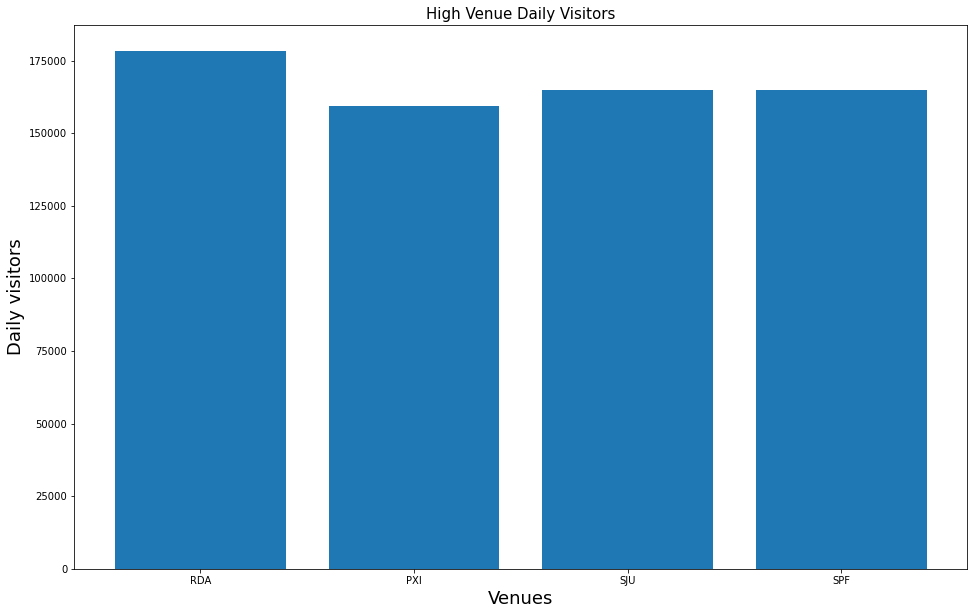

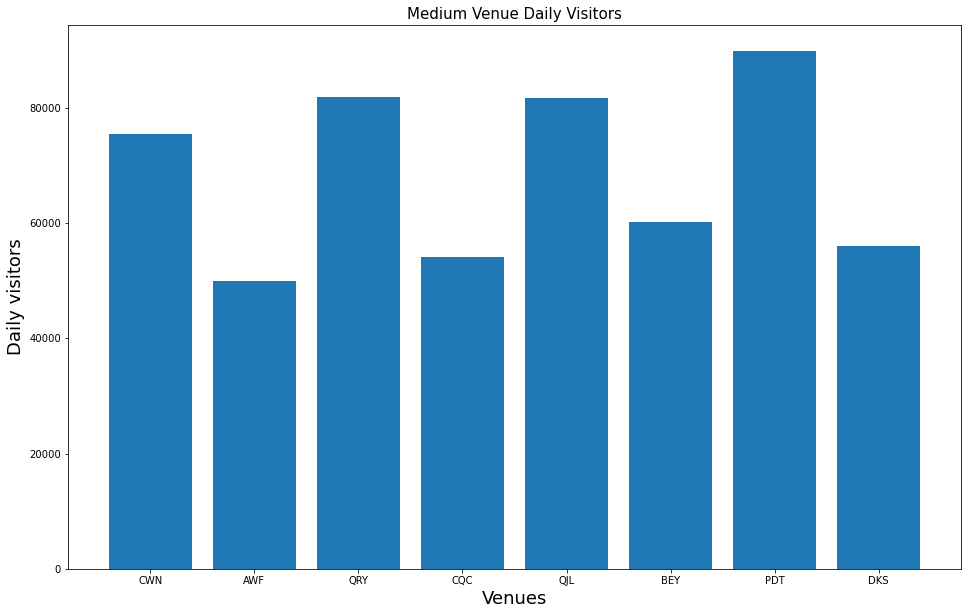

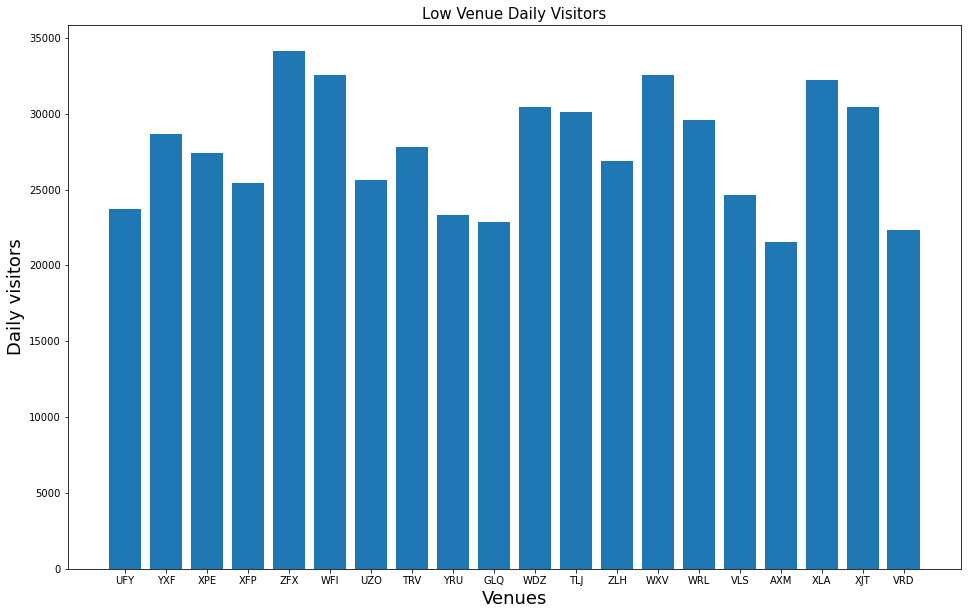

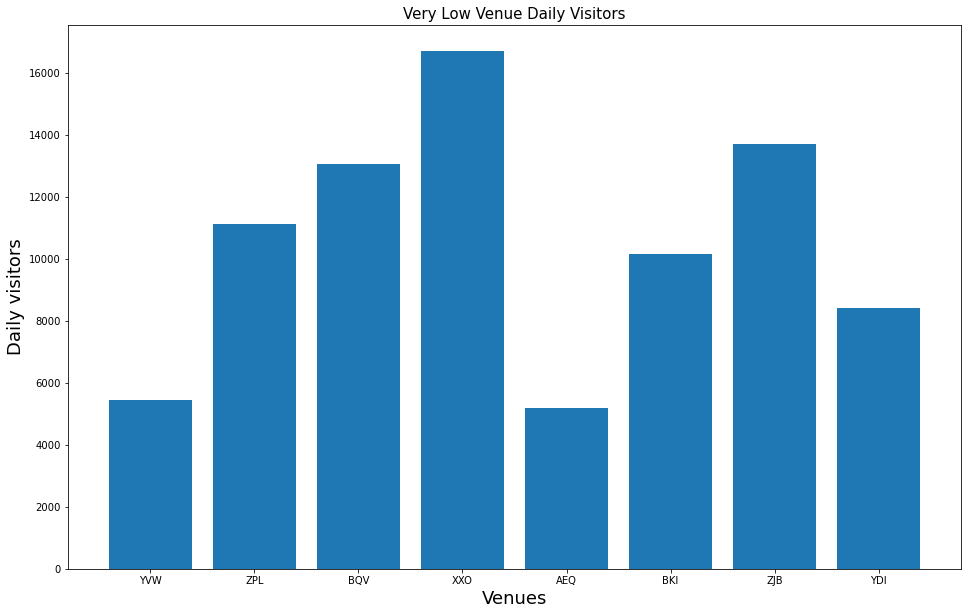

In [539]:

data = DailyVisitor.reindex(DailyVisitor.max(axis=1).sort_values().index)
categories = ['High', 'Medium', 'Low', 'Very Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    daily_visitors = data[name].sum()
    if daily_visitors > 150000:
        category = 0
    elif daily_visitors > 48000:
        category = 1
    elif daily_visitors > 20000:
        category = 2
    else:
        category = 3
    categories_selected[category].append(name)
    print('Venue ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(16, 10))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Venues', fontsize=18)
    plt.ylabel('Daily visitors', fontsize=18)
    plt.title(categories[i] + ' Venue Daily Visitors', fontsize=15)
    plt.show()

### Justification: Through this bar graph, we want to get an overview about the relational information of the total number of daily visitors visiting the venues over a period of year.
### Description:  The given data contains daily visitors at each of the given venues for the whole year (2019 – 2020), for observing the venues with the high, medium, and low volume daily visitors we have taken the sum of each venue. Summing will help us in the segmentation of the data into the above-mentioned categories. X- axis have all the venues and Y- axis displays us the number of daily visitors. From the graph, we can observe that RDA, PXI, SJU, SPF are venues with high volume visitors which are represented by green colour. Alternatively, the medium volume venues are represented by orange colour, red colour for low volume, and bleck for very low volume venues.


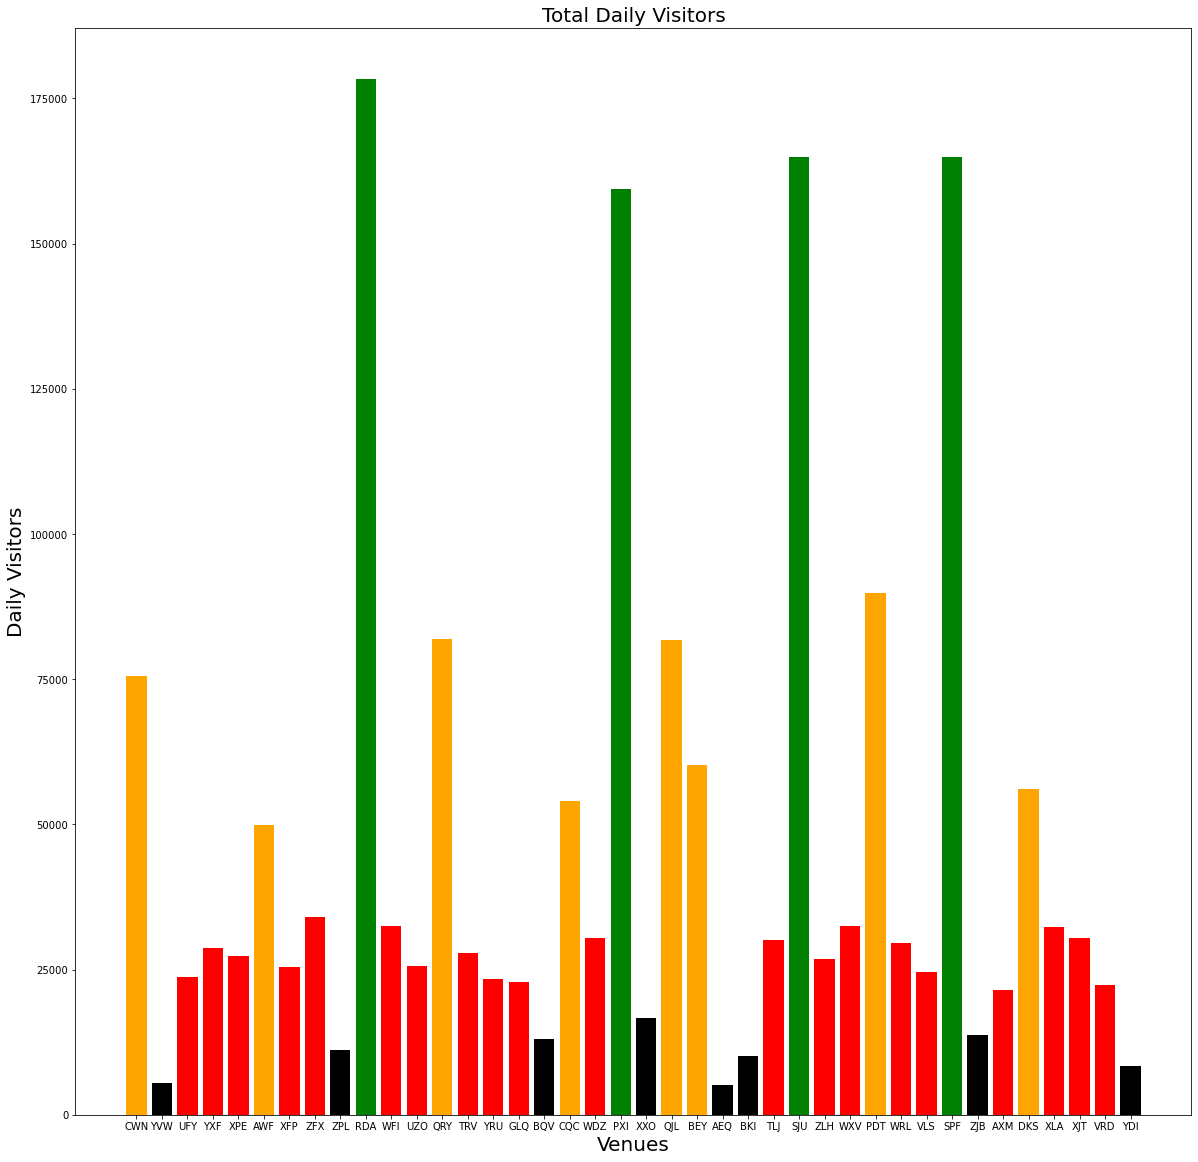

In [540]:
# Bar Chart for Daily Visitors 

colours = []
for name in DailyVisitor.columns:
    daily_visitors = DailyVisitor[name].sum()
        
    if daily_visitors > 150000:
        colour = 'green'
    elif daily_visitors > 48000:
        colour = 'orange'
    elif daily_visitors > 20000:
        colour = 'red'
    else:
        colour = 'black'
    colours.append(colour)

plt.figure(figsize=(20, 20))
x_pos = np.arange(len(DailyVisitor.columns))
plt.bar(x_pos, DailyVisitor.sum(), align='center', color=colours)
plt.xticks(x_pos, DailyVisitor.columns)
plt.xlabel('Venues', fontsize= 20)
plt.ylabel('Daily Visitors', fontsize= 20)
plt.title('Total Daily Visitors', fontsize=20)
plt.show()

### I have made 3 arrays: HighSelected, MediumSelected and LowSelected to hold the columns of the Daily Visitor data which was previously segmented based on their distribution.

In [541]:
HighSelected = ['RDA', 'PXI', 'SJU', 'SPF']
MediumSelected = ['CWN', 'AWF', 'QRY', 'CQC', 'QJL', 'BEY', 'PDT', 'DKS']
LowSelected = ['UFY', 'YXF', 'XPE', 'XFP', 'ZFX', 'WFI', 'UZO', 'TRV', 'YRU', 'GLQ', 'WDZ', 'TLJ', 'ZLH', 'WXV', 'WRL', 'VLS', 'AXM', 'XLA', 'XJT', 'VRD']


### Justification: I have plotted a Line Plot for further exploration of the Time Series Data (DailyVisitor).

### Description: The Line Plot below shows us the evolution of the series over the whole year, but the plot contains noise which do not let us draw conclusion from the data.


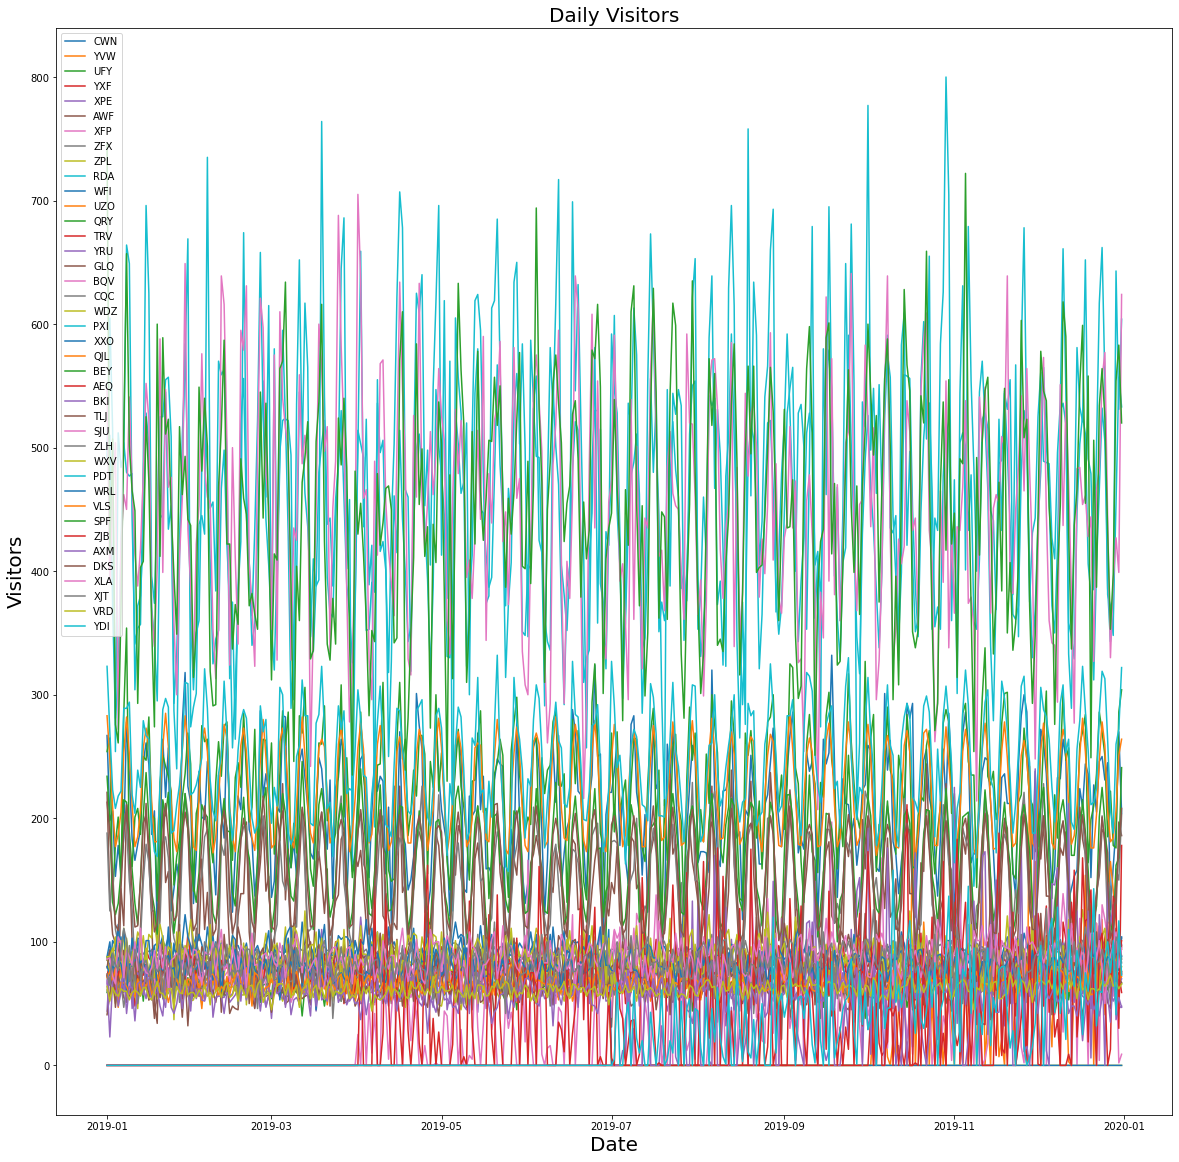

In [563]:

plt.figure(figsize=(20,20))
plt.plot(DailyVisitor)
plt.title('Daily Visitors', fontsize=20)
plt.legend(DailyVisitor.columns, loc=2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Visitors', fontsize=20)
plt.show()

### Justification: For further analysis of the Time Series i have plotted a line plot with rolling average of 21 days with trendline to get the insight of the Daily Visitors( Trend ) of each Venue.

### Description: We can clearly observe the trend of the Venues with high , Medium and Low Volumes of Daily Visitors.

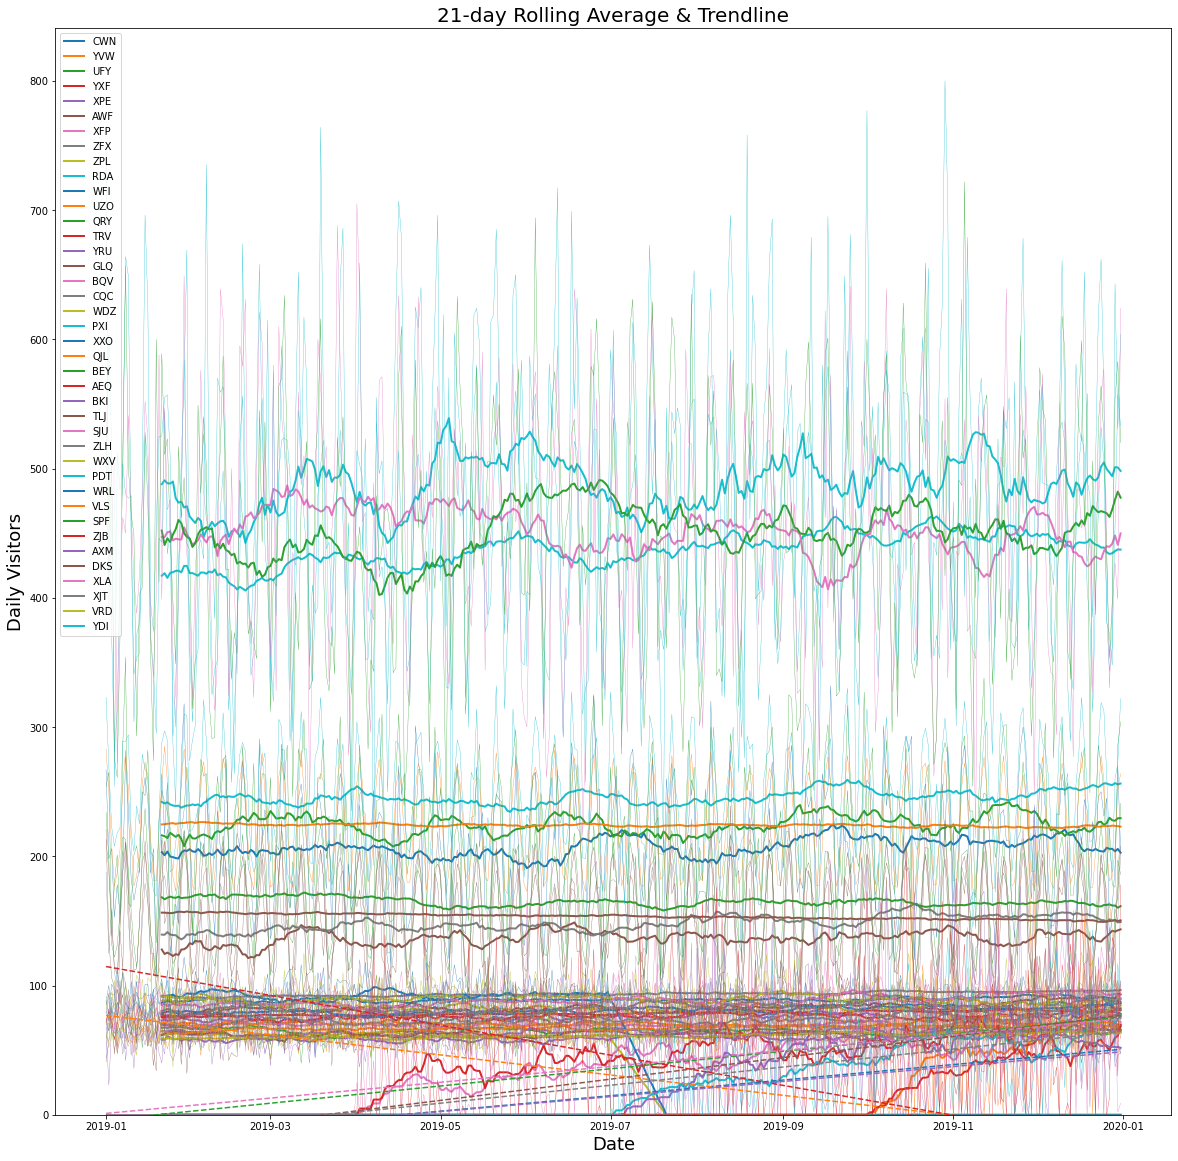

In [543]:
# just for understanding, how data series fluated during on time with noise data.
period = 21
rolling_average = DailyVisitor.rolling(window=period).mean()
plt.figure(figsize=(20, 20))
plt.plot(rolling_average[DailyVisitor.columns], linewidth=2)
plt.gca().set_prop_cycle(None)
plt.plot(DailyVisitor[DailyVisitor.columns], linewidth=0.3)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(DailyVisitor[name]))
    z = np.polyfit(x, DailyVisitor[name], 1)
    trend = np.poly1d(z)
    plt.plot(DailyVisitor.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Visitors', fontsize=18)
plt.title('21-day Rolling Average & Trendline', fontsize=20)
plt.legend(DailyVisitor.columns, loc=2)
plt.show()

### Justification: For further exploration of the time series (Daily Visitor) data, we have plotted line graph for getting insight on the overall trend over the given time. Additionally, we will find which of the venues are opened and closed over the year.
### Description: We have plotted a line plot with rolling average (mean) of 21 days with tread line. Moreover, we have excluded noise from the time series for getting insights on the trend and any seasonal behaviour our time series show. On the x – axis we have date and y-axis show the mean daily visitors. From the plot, we can observe 4 high volume venues which range in 400 to 500. Medium volume venues range from 250 to 100 and the low volume venues are lower below. ZPL and XXO venues are closed in the month of July 2019 and venues which are opened during the year are as follows: ZJB, BQV, BKI, YDI, YUW, AEQ.



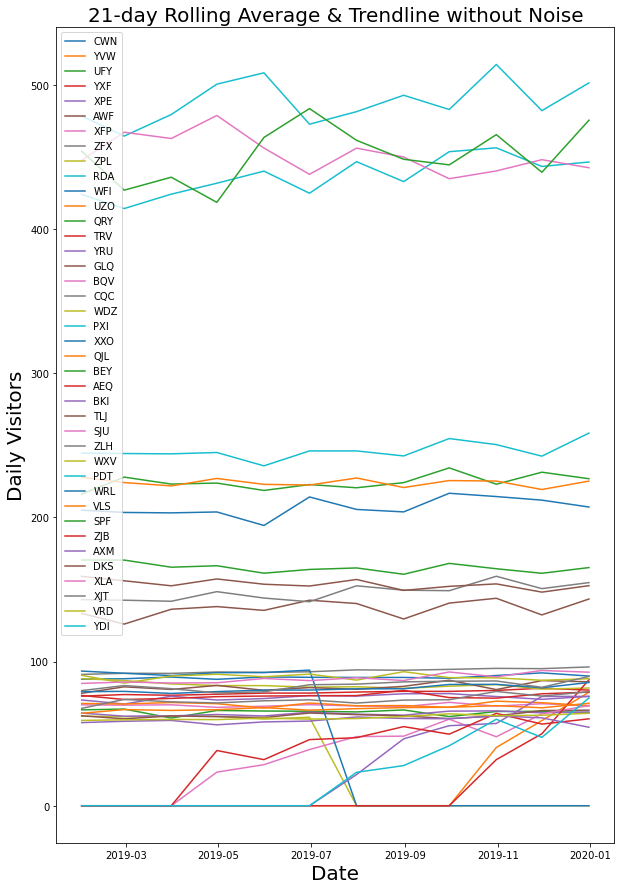

In [544]:
# on this part, I display monthly time tseries for venues which are closed and open during time periods because, I can decided
# easily seen this clear trend ling using rolling function.


sample_rate = 'M'
average_data = DailyVisitor.resample(sample_rate).mean()
plt.figure(figsize=(10,15))
plt.plot(average_data)
plt.title('21-day Rolling Average & Trendline without Noise', fontsize=20)
plt.legend(DailyVisitor.columns, loc=2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Daily Visitors', fontsize=20)
plt.show()

### Justification: I have included time series dashboard by which we can perform a deeper analysis on the Series, the dashboard gives us the the features to set the Volume of Selected Venues( High, Medium, Low), range of rolling avarages and lastly the duration from which we have to visualize.

### Description:Moreover it offers many interactive features like zoom in, zoom out , reset and let us save the visualisation.

## Interactive Dashboards
## Instructions
#### On the Right hand corner we have a tool box with the help of those tools we can interact with the Dashboards
#### 1. Pan Tool - we can use for panning the graphs 
#### 2. Box Zoom - we can use for Zooming selected part of a graph
#### 3. Scroll Zoom - we can use for Zooming and Scrolling it at the same time
#### 4. Save Tool - Save Tool is used for saving the graph locally
#### 5. Reset Tool - Reset tool is used for resetting the graph it will drop all the changes 
#### 6. Hover Tool - Hover tool is used while hovering it on the graph - there and then we will get insights of particular part

In [545]:
time_title = '## Time-Series'
volumes = ['High', 'Medium', 'Low']
select = []

pn.extension()

def linegraph(volume, window_size, date_range):
    if volume == 'High':
        select = HighSelected
    elif volume == 'Medium':
        select = MediumSelected
    else:
        select = LowSelected
    frame = DailyVisitor[select] # restrict to selected products
    frame = frame.rolling(window=window_size).mean() # calculate rolling average
    frame = frame.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    return frame.hvplot.line(frame_width=600, grid=True)

def update_time_row(event):
    time_row[1].object = linegraph(volume.value, day_avg.value, time_date_range.value)

    
volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(DailyVisitor.index[0], DailyVisitor.index[-1]),
                                        start=DailyVisitor.index[0], end=DailyVisitor.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    linegraph(volume.value, day_avg.value, time_date_range.value)
)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['High', 'Medium', 'Low'], value='High', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(NdOverlay)

### Justification: For Correlation, we have included a dashboard that includes scatter plot and heatmap for knowing the measure of dependence between our quantitative variables. We are looking forward to knowing which venues have high, moderate, and low correlation. The overall pattern of a scatterplot varies in the direction, form, and the strength of the relationship. Additionally, outliers can be detected from the plots which falls outside the overall pattern of the relationship.
### Description: The correlation heatmap displays us the linear relationship between our venues. The correlation matrix ranges from 1 to -1. If the matrix value is equal or trending towards 1, then we can say that if one variable increases, the other variable also increases.  XXO – ZPL, DKS – QJL, DKS – BEY, QJL – PXI are venues that show highly positive correlation. Alternatively, If the matrix value is equal or trending towards -1, then we can say that if one variable increases, the other variable decreases. YDI – ZPL, YDI – XXO venues show highly negative correlation and the venues with matrix value ranging around 0, not dependent on each other; changes randomly with respect to each other and the dashboard provides the flexibility to zoom in, zoom out and save the different visualisations for deeper analysis.


# Interactive Dashboards
## Instructions
#### On the Right hand corner we have a tool box with the help of those tools we can interact with the Dashboards
#### 1. Pan Tool - we can use for panning the graphs 
#### 2. Box Zoom - we can use for Zooming selected part of a graph
#### 3. Scroll Zoom - we can use for Zooming and Scrolling it at the same time
#### 4. Save Tool - Save Tool is used for saving the graph locally
#### 5. Reset Tool - Reset tool is used for resetting the graph it will drop all the changes 
#### 6. Hover Tool - Hover tool is used while hovering it on the graph - there and then we will get insights of particular part

In [546]:
def get_correlation_plots(venue_x, venue_y, date_range):
    df = DailyVisitor.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    return df.hvplot.scatter(frame_height=250, frame_width=250,
                             x=venue_x, y=venue_y,
                             title=venue_x + ' vs ' + venue_y,
                             size=10, padding=0.1) +\
           df.corr().hvplot.heatmap(frame_height=250, frame_width=300,
                                    title='Venues Correlations',
                                    rot=90, cmap='coolwarm'
                                   ).opts(invert_yaxis=True, clim=(-1, 1))


correlation_title = '### Correlations'

venue_x = pn.widgets.Select(name='x-axis', options=list(DailyVisitor.columns), width=200)
venue_y = pn.widgets.Select(name='y-axis', options=list(DailyVisitor.columns), width=200)
corr_date_range = pn.widgets.DateRangeSlider(name='Dates',
                                        value=(DailyVisitor.index[0], DailyVisitor.index[-1]),
                                        start=DailyVisitor.index[0], end=DailyVisitor.index[-1],
                                        width=200)

correlation_row = pn.Row(
    pn.Column(correlation_title, venue_x, venue_y, corr_date_range),
    get_correlation_plots(venue_x.value, venue_y.value, corr_date_range.value)
)

def update_correlation_row(event):
    correlation_row[1].object = get_correlation_plots(venue_x.value, venue_y.value, corr_date_range.value)

product_x.param.watch(update_correlation_row, 'value')
product_y.param.watch(update_correlation_row, 'value')
corr_date_range.param.watch(update_correlation_row, 'value')

correlation_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='x-axis', options=['CWN', 'YVW', ...], value='CWN', width=200)
        [2] Select(name='y-axis', options=['CWN', 'YVW', ...], value='CWN', width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(Layout)

### Interactive Histogram shows the distribution of the top 4 Venues with the most volume of Daily visitors. Moreover, it provides the fexibility to visualise the selected venue and let us zoom in and zoom out respectively.

In [547]:
#interactive histogram with bins

x_min = 200
x_max = 700
bin_width = 10
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plot = DailyVisitor[HighSelected].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Customer Per Day', ylabel='Frequency of customer',
    title='High Volume Customers in Store',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    bins=bins
)
hvplot.show(plot)

51 bins
Launching server at http://localhost:64683


### Justification:  Using Boxplot we get the overview of the skewness of the data, whether it is positively skewed or negatively skewed data by displaying data quartiles and averages. The five number summary include minimum score, first quartile, median, third quartile and maximum score. And outliers are shown by dots that can be seen after maximum and minimum score. 
### Description: We can clearly see from the boxplot that the high-volume venues have the largest spread, the skewness of the medium volume venues have positive Skew (median is closer to the bottom of the box) and the low volume venues contains the most outliers which is seen by the dots above. The box in the plot contains 50% of the whole data, the line centre to the box is the median of that venue. Additionally, we can get the knowledge about the maximum, minimum value, first quartile (25%), and the third quartile (75%) values for each venue.


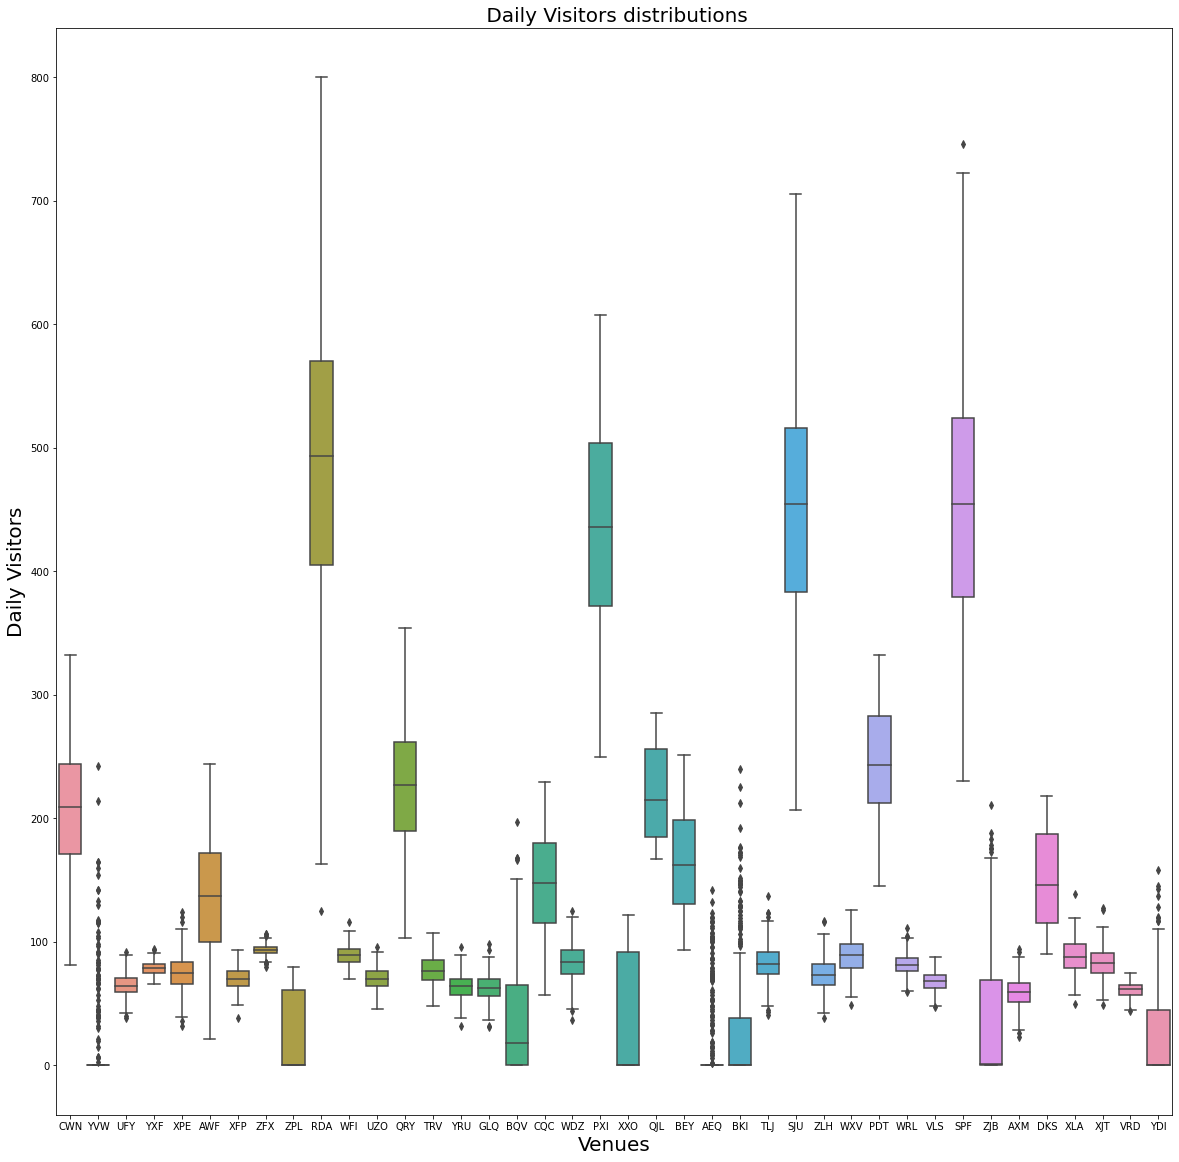

In [548]:

plt.figure(figsize=(20, 20))
# data[selected].boxplot()
sns.boxplot(data = DailyVisitor)
plt.xlabel('Venues', fontsize=20)
plt.ylabel('Daily Visitors', fontsize=20)
plt.title(' Daily Visitors distributions', fontsize=20)
plt.show()


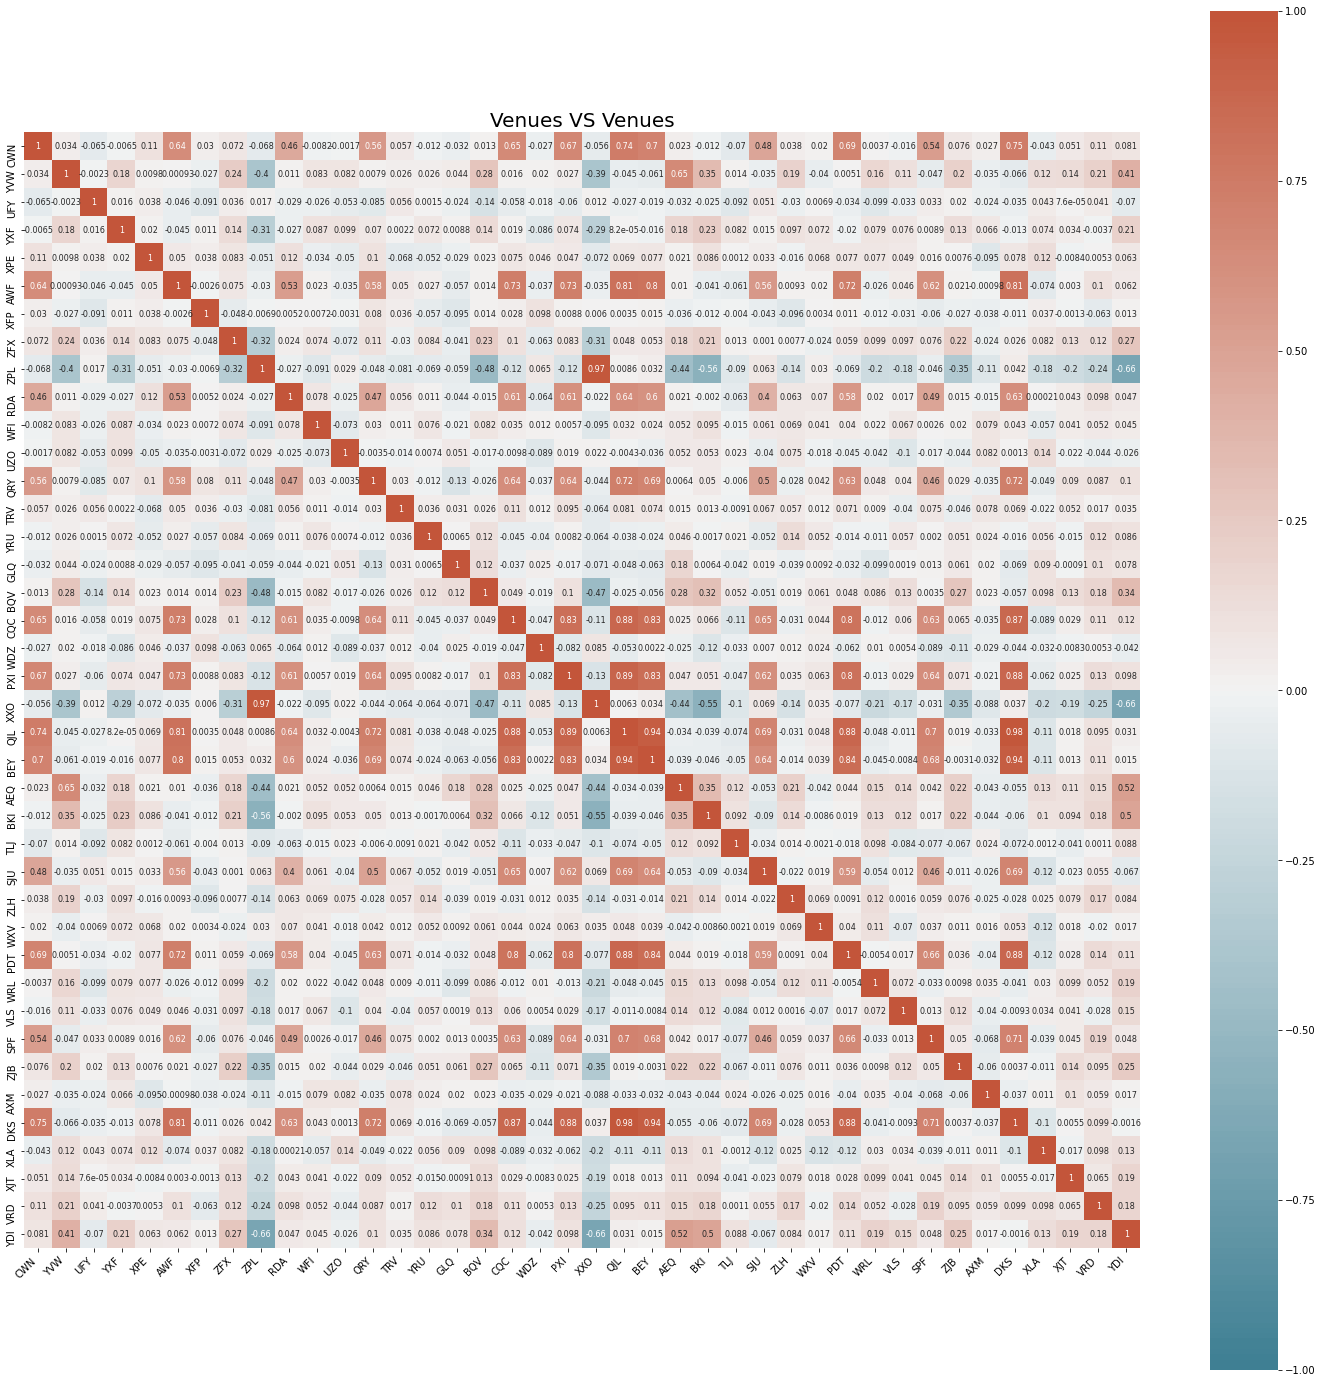

In [549]:
# just for understanding
plt.figure(figsize=(25, 25))
correct = DailyVisitor[DailyVisitor.columns].corr()
cocorre = sns.heatmap(correct, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
cocorre.set_xticklabels(cocorre.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Venues VS Venues', fontsize=20)
plt.show()

### Justification: Autocorrelation plots have been utilised for the relationship between two values of the time series. The plots vary from +1 to -1, which measures current values against past values and find whether the series correlate.
### Discription: From the above autocorrelation plots of high and medium volume venues, we can say that the venues namely: RDA, PXI, SJU, SPF, CWN, AWF, QRY, CQC, QJL, BEY, PDT, DKS are highly correlated Each spike in the plots fall outside the dashed line, which is statistically significant. This means that each of the venues show the similar trend in daily visitors over the year. Venues which are difficult to conclude by looking at these plots, so we did our analysis by zooming in function provided by the pandas. After seasonal decomposition we can conclude that all these venues show weekly seasonality with a positive trend. 


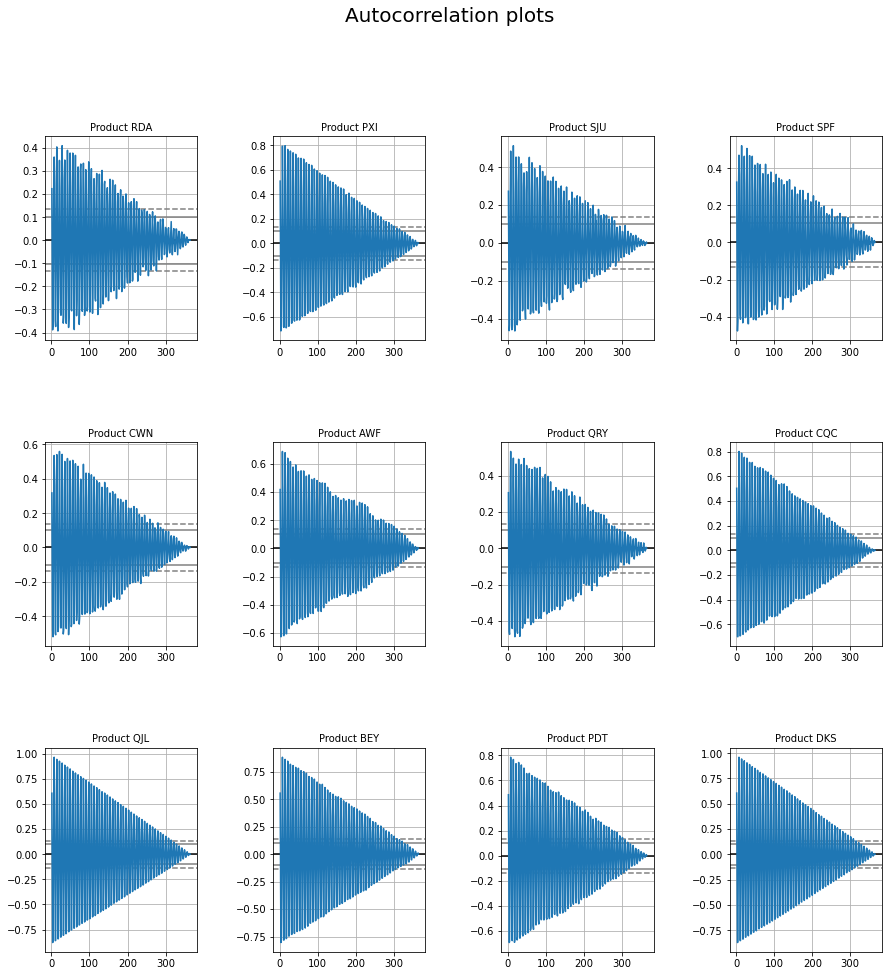

In [550]:
#  auto correlation
con = HighSelected + MediumSelected
row = 0
col = 0
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=4)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in DailyVisitor[con].columns:
    sub = pd.plotting.autocorrelation_plot(DailyVisitor[name], axes[row, col])
    sub.set_title('Product ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 4:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


### For futher exproration on the above autocorrelation plots i have used the zooming function for checking the seasonality in the time series.


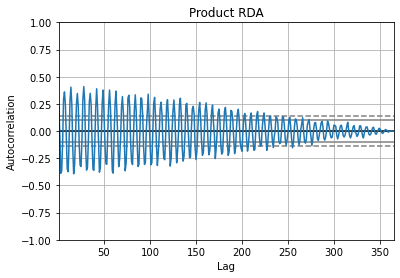

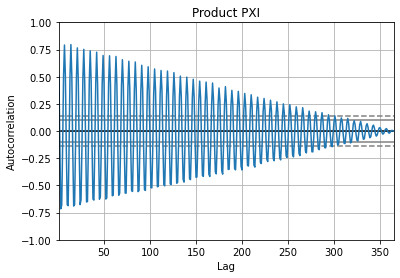

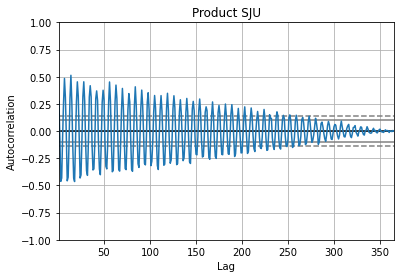

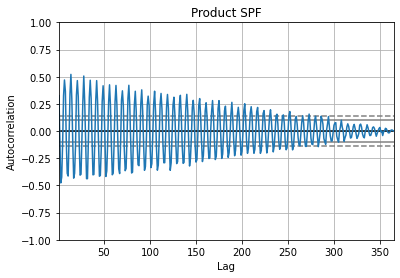

In [551]:
# high volume data
for name in DailyVisitor[HighSelected]:
    pd.plotting.autocorrelation_plot(DailyVisitor[name])
    #plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Product ' + name)
    plt.show()

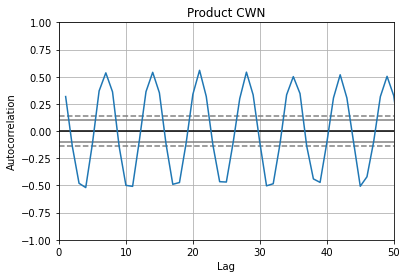

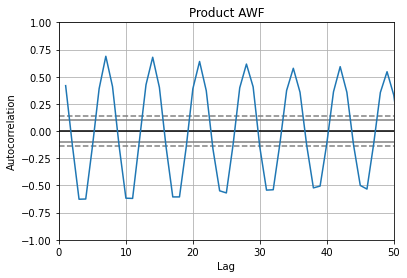

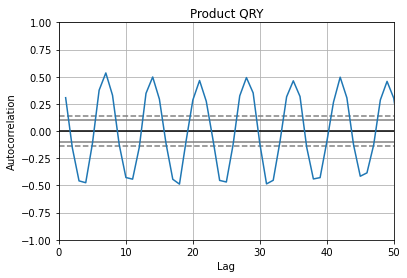

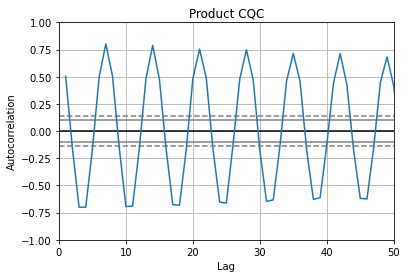

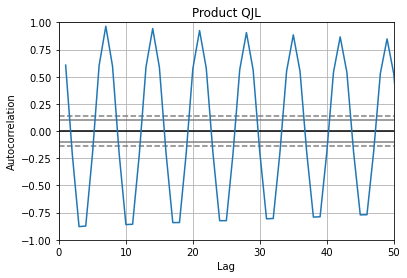

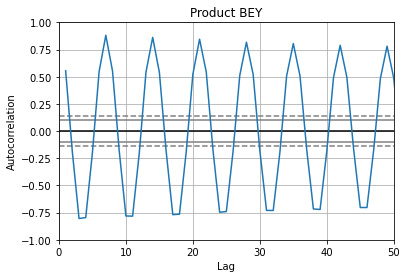

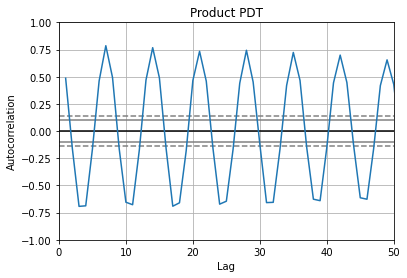

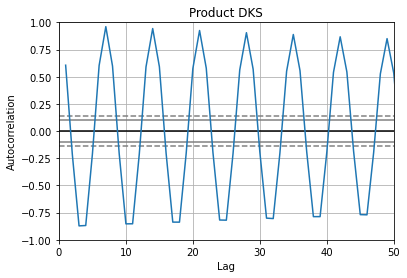

In [552]:
# medium volume data
for name in DailyVisitor[MediumSelected]:
    pd.plotting.autocorrelation_plot(DailyVisitor[name])
    plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Product ' + name)
    plt.show()

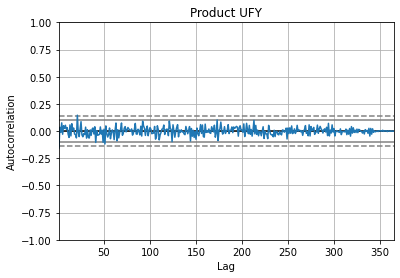

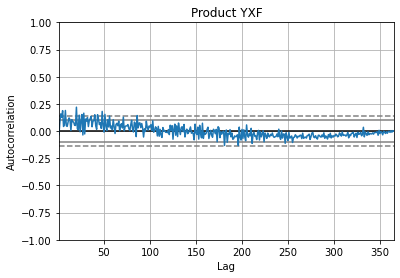

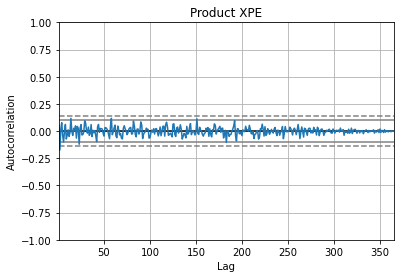

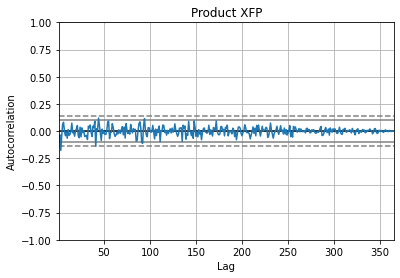

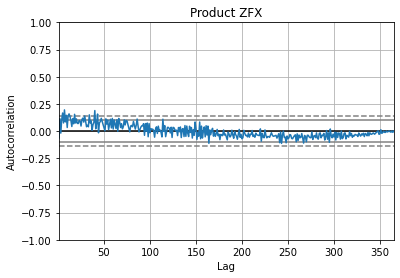

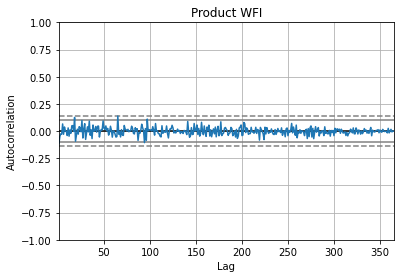

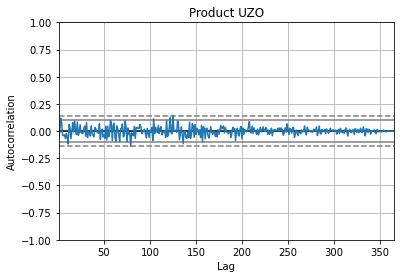

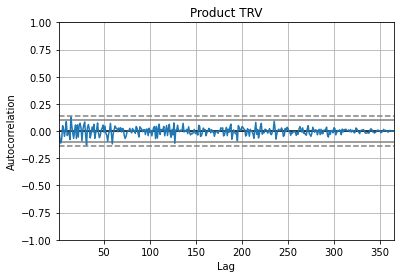

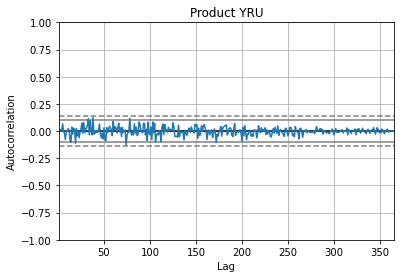

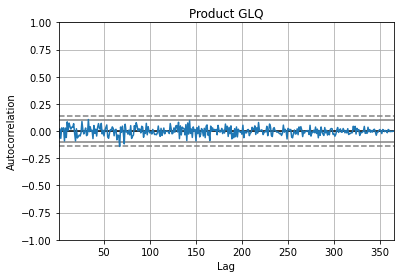

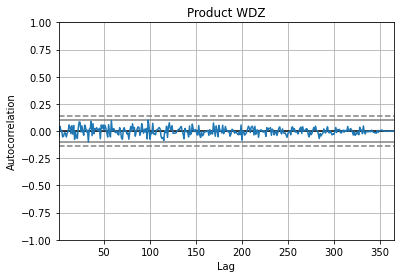

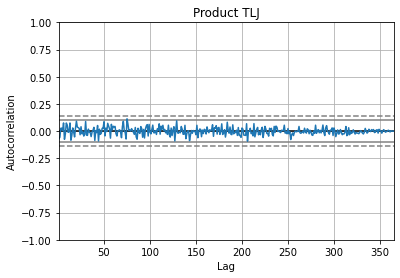

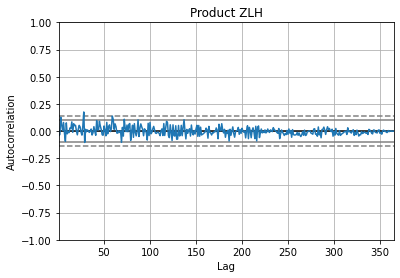

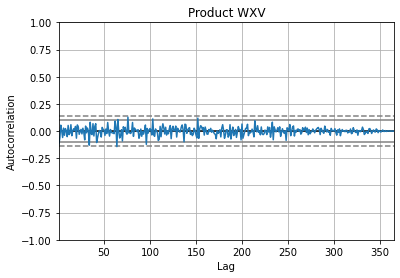

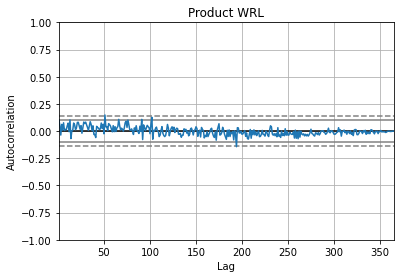

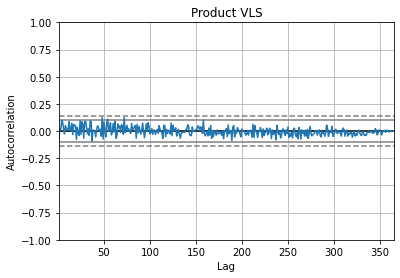

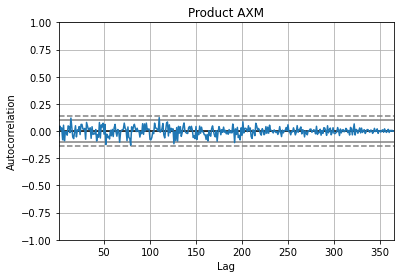

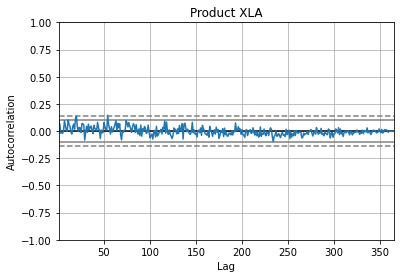

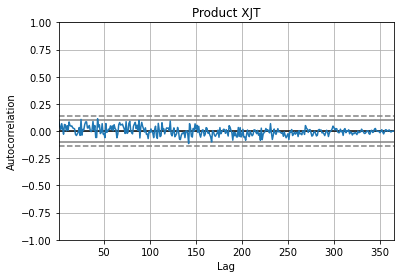

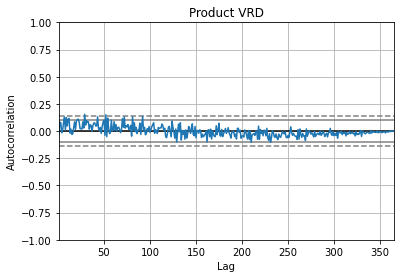

In [553]:
# Low volume data
for name in DailyVisitor[LowSelected]:
    pd.plotting.autocorrelation_plot(DailyVisitor[name])
    #plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Product ' + name)
    plt.show()

### Description: Lastly, we have performed the sesonal decomposition on the time series for knowing the overall trend, seasonality and the resid in the venues.

### Description: Most of the venues have the weekly seasonal component and shows positive over all trend.

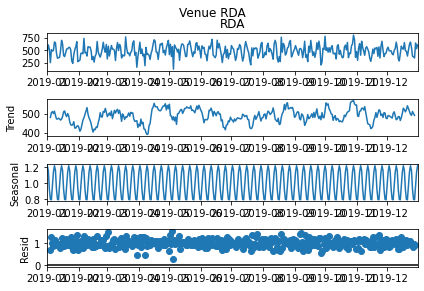

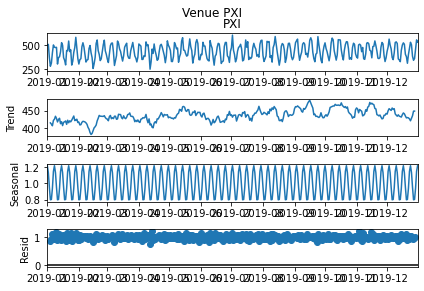

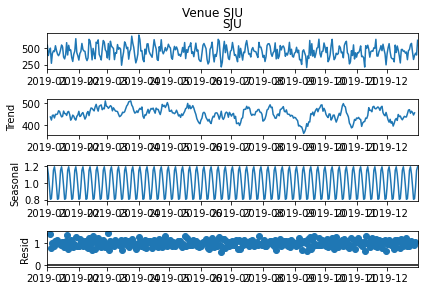

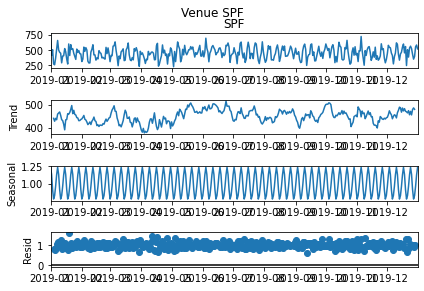

In [554]:
# high volume data
for name in HighSelected:
    result = seasonal_decompose(DailyVisitor[name], model='multiplicative', period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

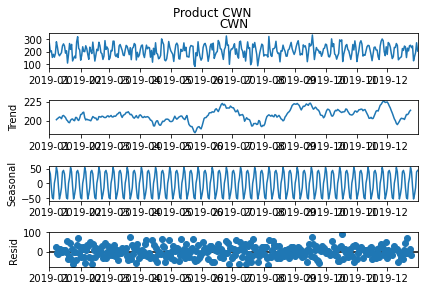

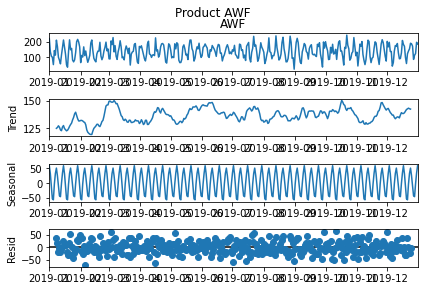

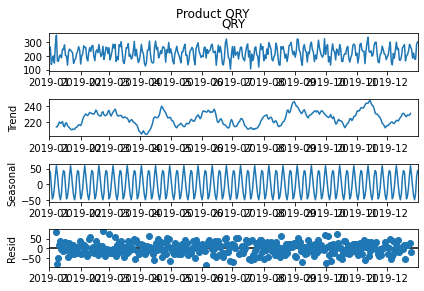

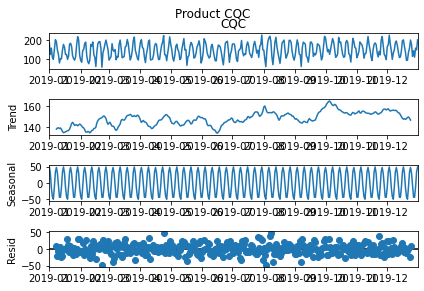

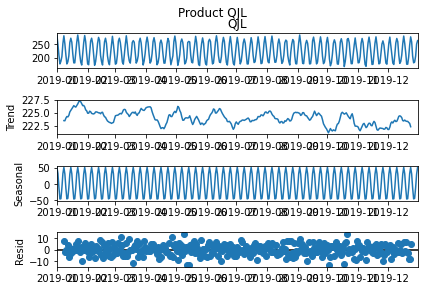

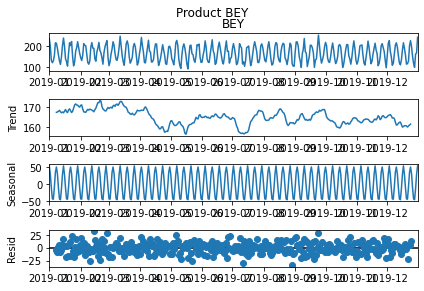

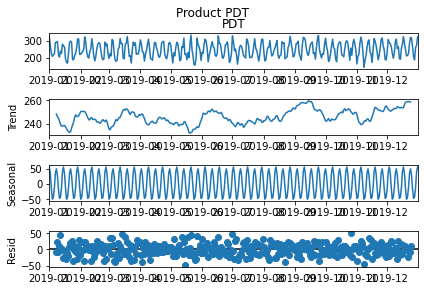

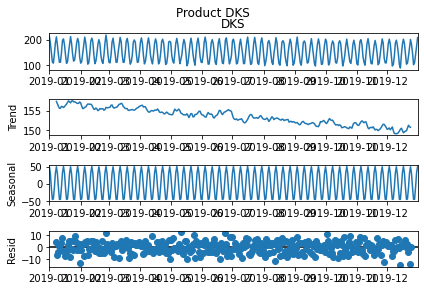

In [555]:
# medium volume data
for name in MediumSelected:
    result = seasonal_decompose(DailyVisitor[name], period=14)
    result.plot()
    plt.suptitle('Product ' + name, position=(0.5, 1.0))
    plt.show()

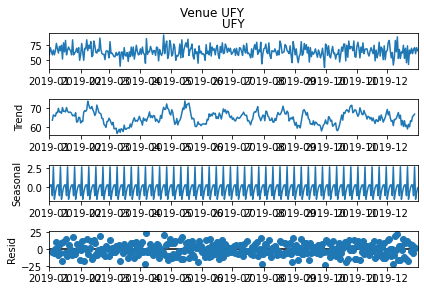

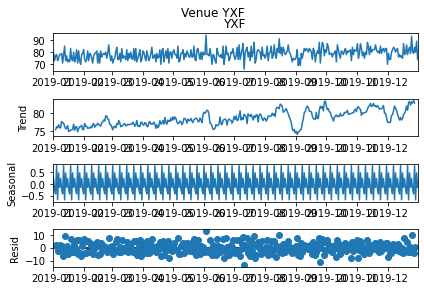

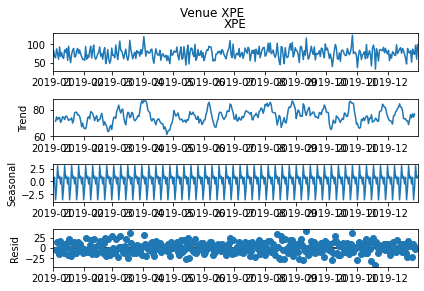

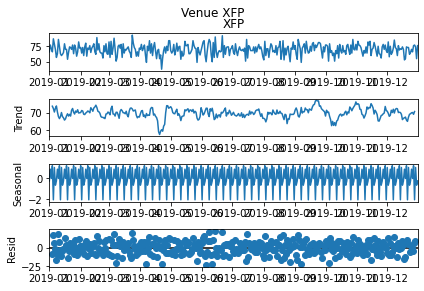

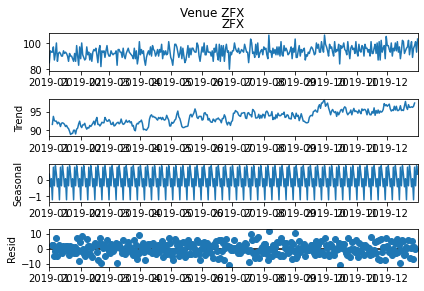

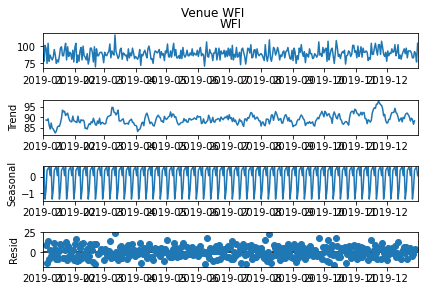

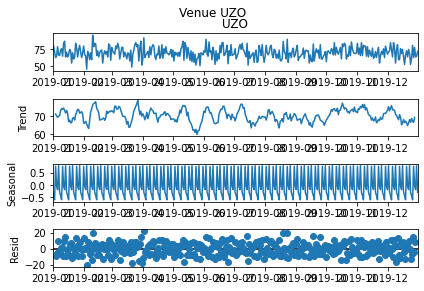

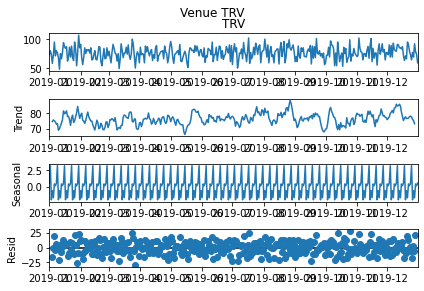

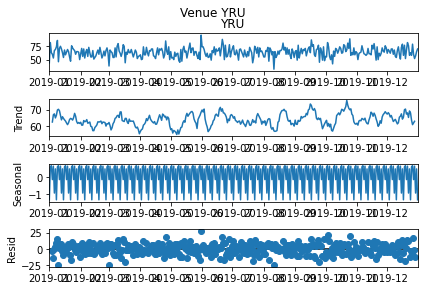

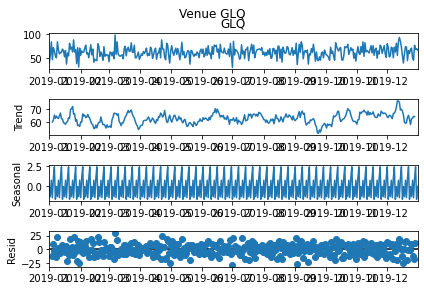

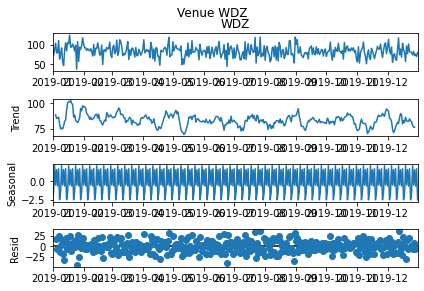

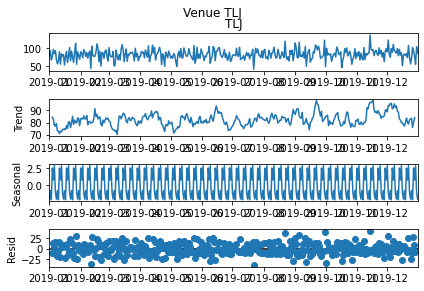

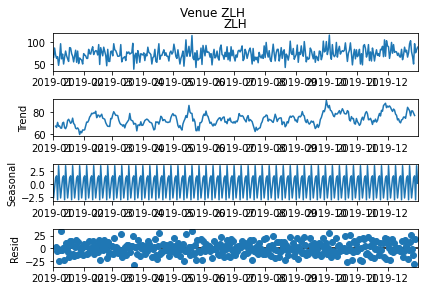

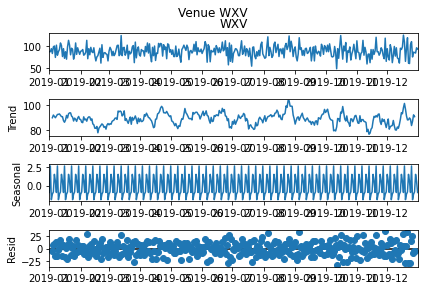

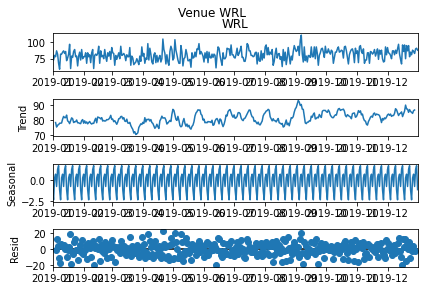

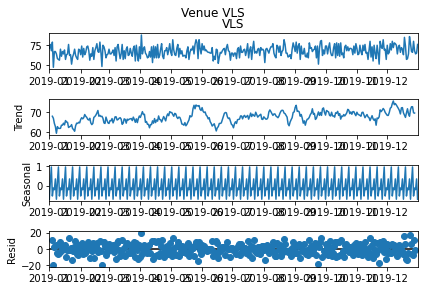

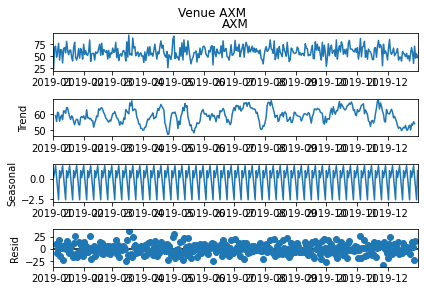

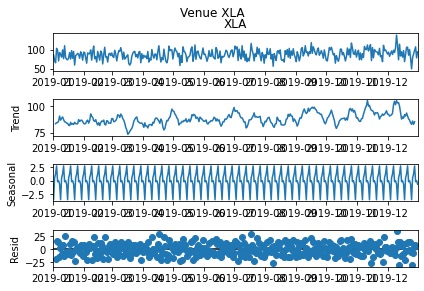

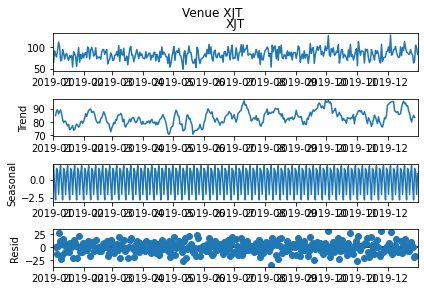

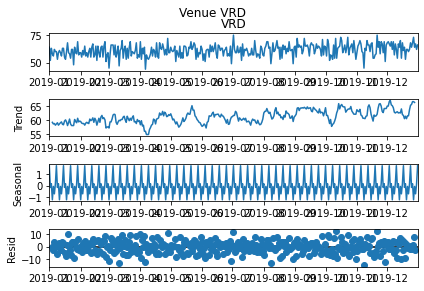

In [556]:
# low volume data
for name in LowSelected:
    result = seasonal_decompose(DailyVisitor[name], period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

# Summary Data 

### I have plotted bar graph for knowing the distribution of the summary data



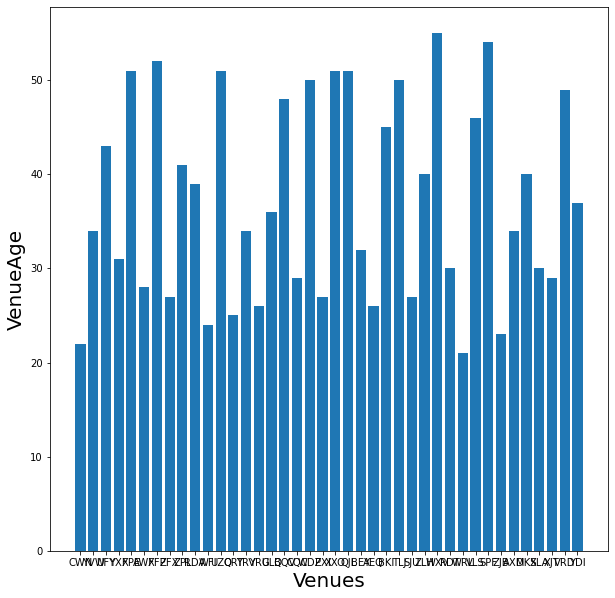

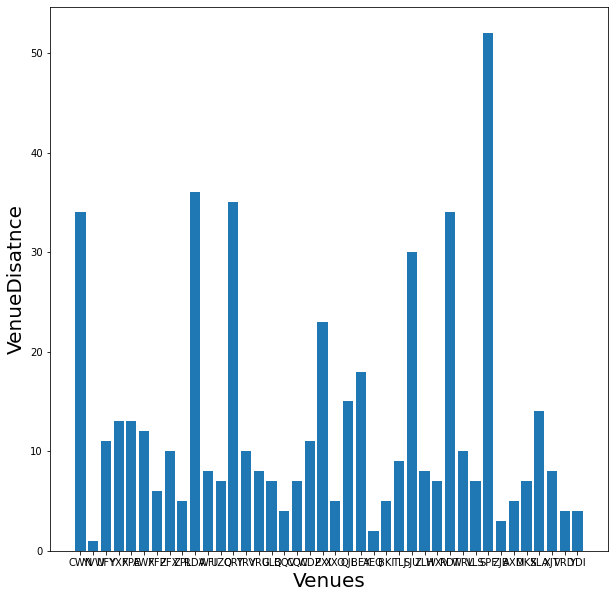

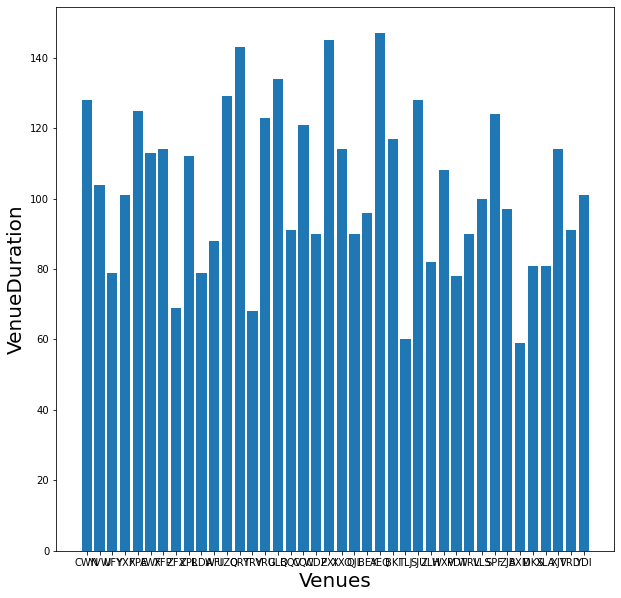

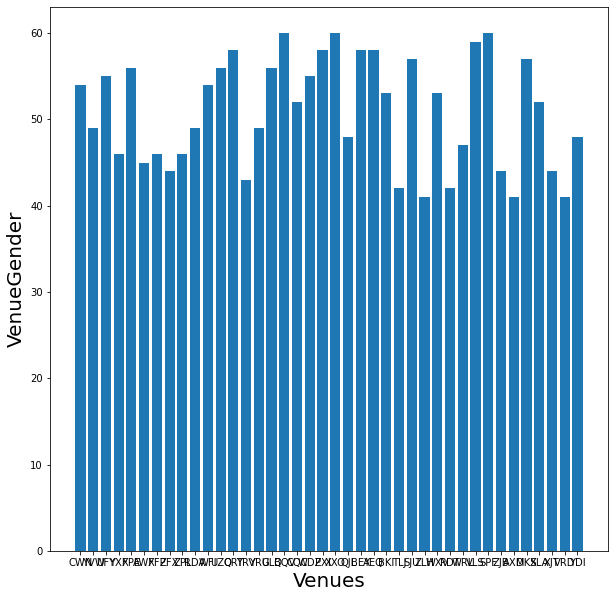

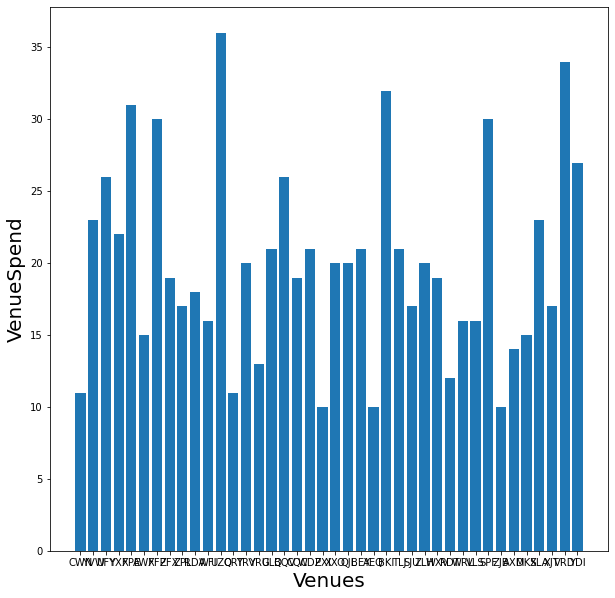

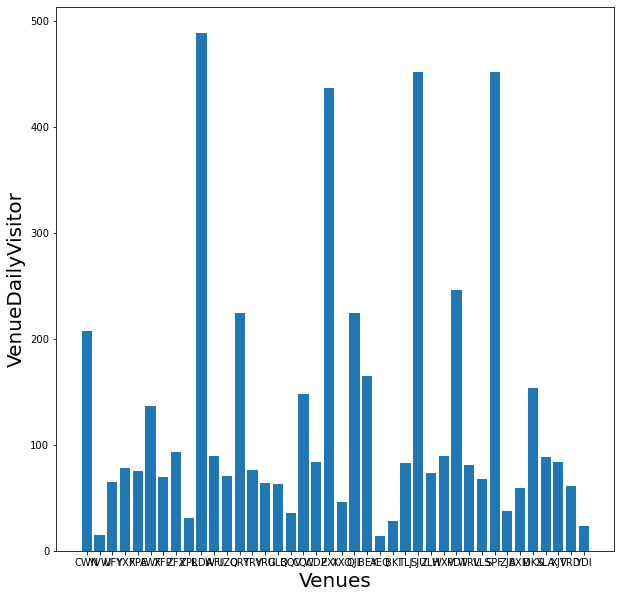

In [557]:
for i in combined_data:
    plt.figure(figsize=(10,10))
    x_pos= np.arange(len(combined_data.index))
    plt.bar(x_pos,combined_data[i],align = 'center')
    plt.xticks(x_pos, combined_data.index)
    plt.xlabel('Venues', fontsize=20)
    plt.ylabel(i, fontsize=20)
    plt.show()

### Justification: i have used Heatmap for getting the correlation between the Summary dataset Variables ( VenueAge, VenueDistance, Venue Duration, Venue Gender, Venue Spend ) 

### Description: We can see that there is a high positive correlation between Venue Dialy Visitors and Venue Distance ( c= 0.86) by which we can say that the footfall of the visitors greatly depends on the distance of that venue.

     VenueAge  VenueDisatnce  VenueDuration  VenueGender  VenueSpend  \
CWN        22             34            128           54          11   
YVW        34              1            104           49          23   
UFY        43             11             79           55          26   
YXF        31             13            101           46          22   
XPE        51             13            125           56          31   

     VenueDailyVisitor  
CWN         206.909589  
YVW          14.964384  
UFY          65.013699  
YXF          78.539726  
XPE          75.095890  


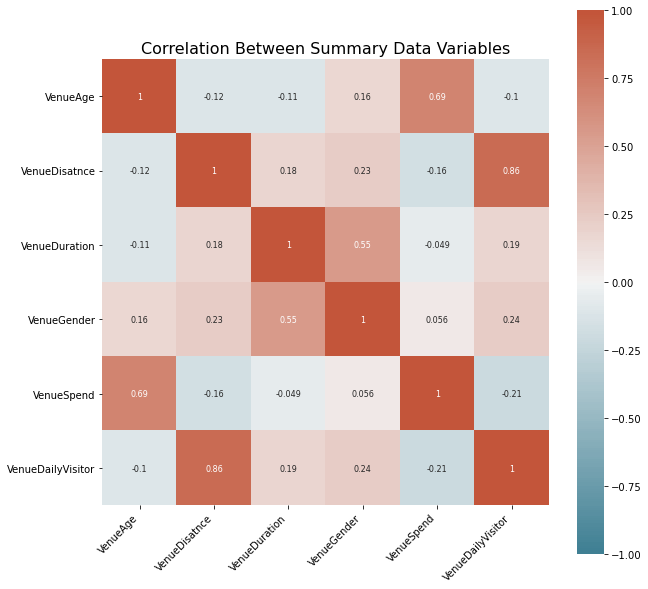

In [558]:
#HeatMap

print(combined_data.head())

plt.figure(figsize=(10, 10))
corr = combined_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Between Summary Data Variables', fontsize=16)

plt.show()

### Justification: Radar graphs are utilized for giving the summary of low volume venues. It offers the flexibility of comparing multiple quantitative variables and useful for gaining insights of the variables having similar values. They are also used for displaying performance among the variables. 
### Description: The radar graph displays us the 20 low volume venues. We can clearly compare the venues in terms of VenueDuration, VenueDistance, VenueAge, VenueVisitor, VenueDailyVisitor, and VenueGender. The radar uses normalised data for plotting. From the plots, it clearly seen that venue ZFX have the maximum Daily Visitors. Largest amount of duration is being spent by the female visitor in venue VLS. Maximum money spend by the visitor in venue UZO and minimum in WRL. Additionally, it can be concluded that visitors spend the most in the venue GLQ and venue WXV is the oldest among them


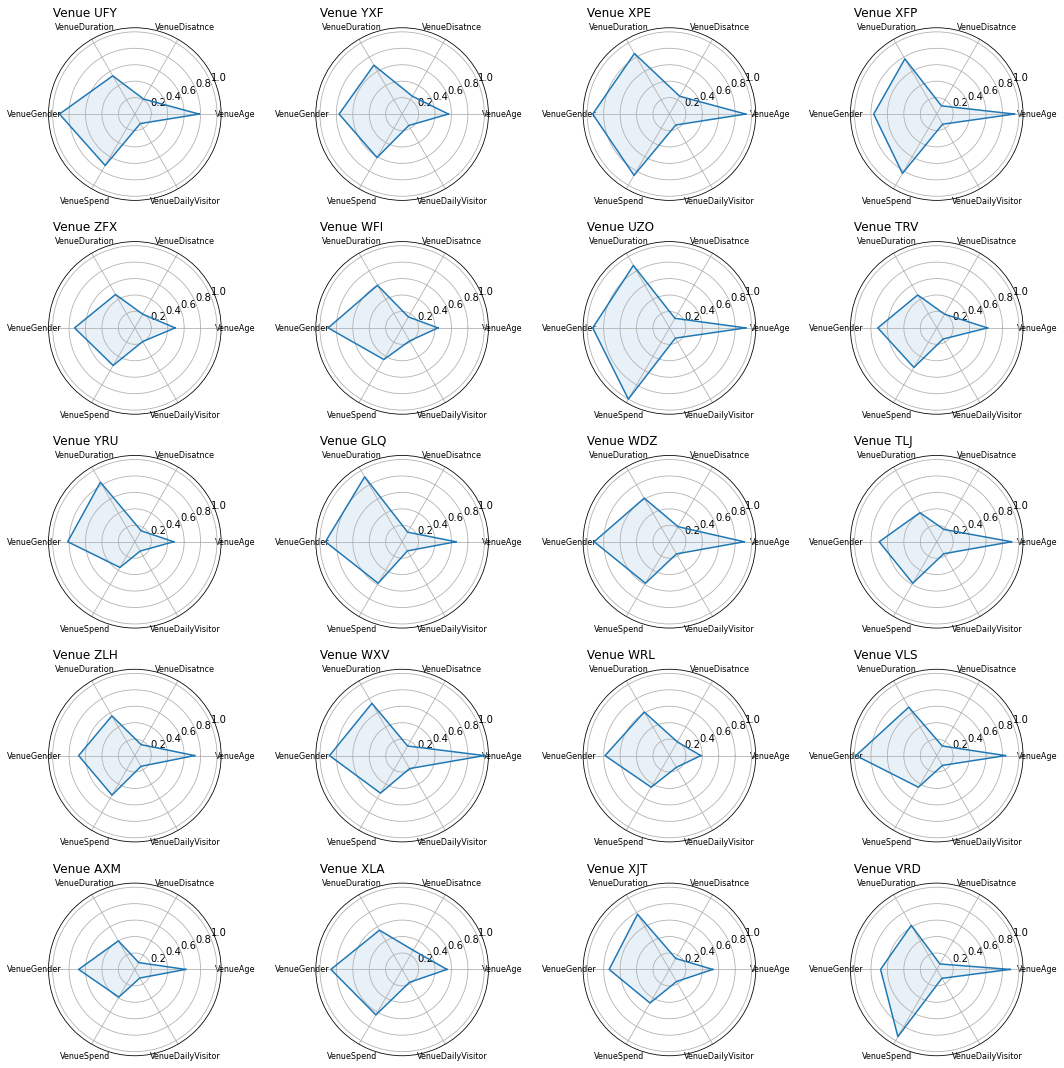

In [559]:
#radar plot

normalised_data = combined_data / combined_data.max()

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(15, 15))
counter = 1
for name in LowSelected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(5, 4, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title(' Venue ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

### Justification: For finding the relationship between our summary data variables, we have used bubble plot dashboard, which displays the data values in pair of variables at (x,y) axis and the bubble represents the third variable (z), which varies in size with the corresponding change in the values. 
### Description: We have a bubble plot above for Age, Distance and Duration of the Venues. From the plot, we can say that isn’t any relationship between the VenueDistance and VenueAge as the bubbles are distributed in a randomised manner. The bubbles (VenueDuration) tend to increase in size when the venues are recently opened, and the distance of the venues are greater than 20. Moreover, it can be observed that visitors like to visit the venues which are not more than 15 miles away irrespective of the age of the venues. The interactive feature of this dashboard increases the usability for the users, relationship between different numerical variables can be compared in real time and it provides the flexibility to zoom in, zoom out and save the different visualisations for deeper analysis.


In [560]:

variables_title = '### Variables'
variables = list(combined_data.columns)
def get_summary_plots(variable_x, variable_y, variable_z, bubble_scaling):
    combined_data['BubbleSize'] = combined_data[variable_z] / combined_data[variable_z].max() * math.exp(bubble_scaling)
    return combined_data.hvplot.scatter(frame_height=250, frame_width=500,
                                       title=variable_x + ' vs ' + variable_y + ' (vs ' + variable_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1,
                                       x=variable_x, y=variable_y, size='BubbleSize') 

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)

variable_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=200)
variable_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=200)
variable_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=200)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=200)

variables_row = pn.Row(
    pn.Column(variables_title, variable_x, variable_y, variable_z, bubble_scaling),
    get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)
)


variable_x.param.watch(update_variables_row, 'value')
variable_y.param.watch(update_variables_row, 'value')
variable_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['VenueAge', 'VenueDisatnc...], value='VenueAge', width=200)
        [2] Select(name='Y-axis', options=['VenueAge', 'VenueDisatnc...], value='VenueDisatnce', width=200)
        [3] Select(name='Bubble', options=['VenueAge', 'VenueDisatnc...], value='VenueDuration', width=200)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, width=200)
    [1] HoloViews(Scatter)

### Justification: We have used clustering for the surface level analysis that gives us insight about the data, through clustering we have found out the anomaly in the data. It is an unsupervised machine learning method which groups similar data points without considering any specific outcome. 
### Description: The above plot is plotted between the amount of money spend in the venues and the distance the visitors travel to reach those venues. For clustering we must define the value of K, for that we have utilized Elbow Method and Silhouette Score for finding the most optimum value. For plotting, we have taken K=3 which divides our data into three clusters. The K Means algorithm optimize the position of the centroids by performing respective calculations which are based on Eucerin distances from the centroid. From the visualization, we can say that there is an anomaly in the orange cluster where VenueSpend is 30 and VenueDistance is greater than 50. Which means that the visitors don’t spend around 30 pounds in the venues which are situated more than 50 miles away. 


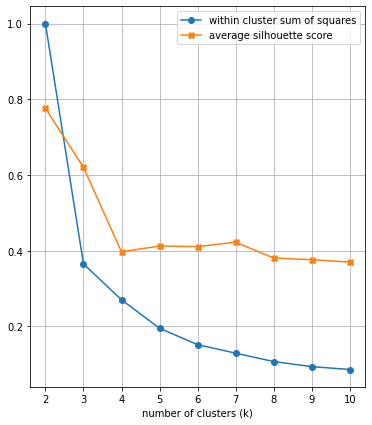

In [561]:
combined_data.drop('BubbleSize', inplace= True, axis=1)
selected = combined_data.columns 
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(combined_data[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(combined_data[selected], labels))
WCSS = np.asarray(WCSS) / max(WCSS)

plt.figure(figsize=(6, 7))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

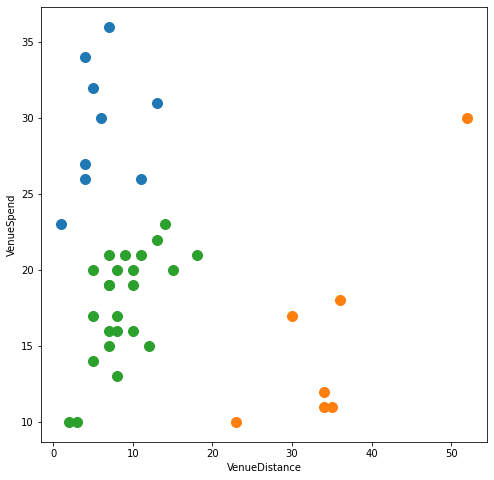

In [562]:
k=3
#selected = combined_data.columns

selected = ['VenueDisatnce', 'VenueSpend']
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
combined_data['label'] = k_means.fit_predict(combined_data[selected])

clusters = []
for c in range(k):
    clusters.append(combined_data[combined_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['VenueDisatnce'], clusters[c]['VenueSpend'], s=100)
#for i, name in enumerate(summary_data.index):
    #plt.annotate(name, (summary_data['Revenue'][i] + 500, summary_data['Hits'][i]))
plt.xlabel('VenueDistance')
plt.ylabel('VenueSpend')
plt.show()